###### Steps for CNN of ASL Dataset

Load ASL training and test datasets 
- don't know how to process the image from individual pixels to torch or matplotlib

Define a Convolutional Neural Network
- working on understand different parts of torch architecture steps

Define a loss function

Train the network on the training data

Test the network on the test data

Visualize # of each letter in datasets(Bar graph to show samples in each class)

Randomly generate 1 sample from each class

Show correctly classified and wrongly classified to show why some are easier to classify vs harder to classify

#### Dataset Origin 
https://www.kaggle.com/datamunge/sign-language-mnist

#### pytorch model inspiration
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

#### tensorflow model inspiration
https://github.com/BrianMH/ECE196_Demo/blob/master/CNN_Demo.ipynb

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# from tensorflow.keras.datasets import mnist

In [2]:
df_test = pd.read_csv('./sign_mnist_test.csv')
df_train = pd.read_csv('./sign_mnist_train.csv')

In [3]:
df_train.head() # shows first 5 entries in training dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#separate labels (letter classes) from training data set
#drop label from rest of pixels
labels_train = df_train['label']
df_train = df_train.drop('label',axis = 1)

In [5]:
# #separate labels (letter classes) from test data set
#drop label from rest of pixels
labels_test = df_test['label']
df_test = df_test.drop('label',axis = 1)

In [6]:
# create dataframe with all labels to make a bargraph
frames = [labels_train,labels_test]
df_all_labels = pd.concat(frames)
print(df_all_labels.shape)
df_all_labels.head()

(34627,)


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [7]:
alphabet_dict = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 
                 6: 'g', 7: 'h', 8: 'i', 10: 'k', 11: 'l', 
                 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 
                 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 
                 22: 'w', 23: 'x', 24: 'y'}
alphabet = ['a', 'b',  'c',  'd', 'e', 'f', 
                 'g', 'h', 'i',  'k',  'l', 
                  'm',  'n',  'o',  'p',  'q', 
                  'r', 's',  't',  'u',  'v', 
                  'w','x','y']
def numToAlpha(numArr):
    templist = list(numArr)
    templistAlpha = [alphabet_dict[number] for number in templist]
    tempArrAlpha = np.array(templistAlpha)
    return tempArrAlpha

In [8]:
# convert pandas df to numpy array and reshape into 28x28 array as prep for picture
''' only relevant for following cell with random image display'''

np_train_img = df_train.to_numpy() #training dataset
np_train_img = np_train_img.reshape(np_train_img.shape[0],28,28)
np_test_img = df_test.to_numpy() # testing dataset
np_test_img = np_test_img.reshape(np_test_img.shape[0],28,28)




In [9]:
#convert pandas to numpy arrays for use in tensorflow
np_test =df_test.to_numpy()
np_train = df_train.to_numpy()
labels_train = labels_train.to_numpy()
labels_test = labels_test.to_numpy()

In [10]:
#converting 


#convert training data to alphabetical labels
# labels_train_list = list(labels_train)
# labels_train_alphabet = [alphabet_dict[number] for number in labels_train_list]
# labels_train_alphabet = np.array(labels_train_alphabet)
labels_train_alphabet = numToAlpha(labels_train)

#convert testing data to alphabetical labels
# labels_test_list = list(labels_test)
# labels_test_alphabet = [alphabet_dict[number] for number in labels_test_list]
# labels_test_alphabet = np.array(labels_test_alphabet)
labels_test_alphabet = numToAlpha(labels_test)

all_labels_alphabet = numToAlpha(df_all_labels)

Text(0.5, 1.0, 'All data')

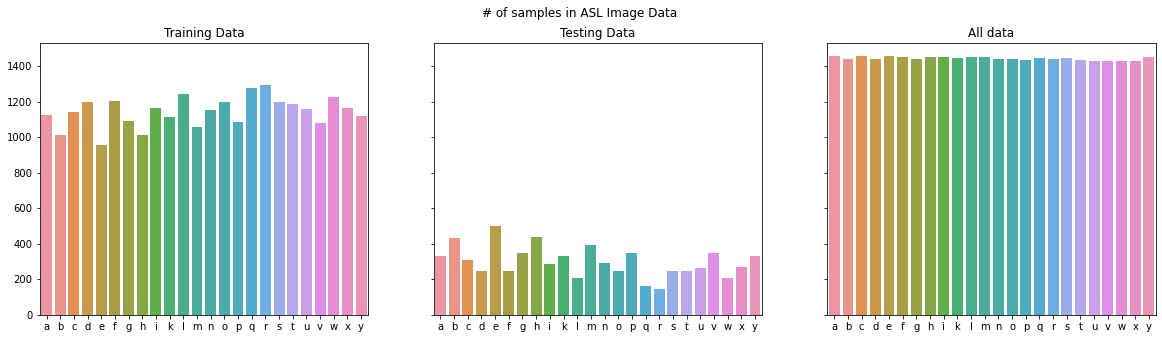

In [11]:
import seaborn as sns
unique, counts_train = np.unique(labels_train_alphabet, return_counts=True)
unique, counts_test = np.unique(labels_test_alphabet, return_counts=True)
unique, counts_all = np.unique(all_labels_alphabet, return_counts=True)

'''Want to change so that 0,1,2,3 etc reads A,B,C,D etc'''
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('# of samples in ASL Image Data')

# Train data
sns.barplot(ax=axes[0], x=alphabet, y=counts_train)
axes[0].set_title('Training Data')

# Test Data
sns.barplot(ax=axes[1], x=alphabet, y=counts_test)
axes[1].set_title('Testing Data')

# Combined
sns.barplot(ax=axes[2], x=alphabet, y=counts_all)
axes[2].set_title('All data')

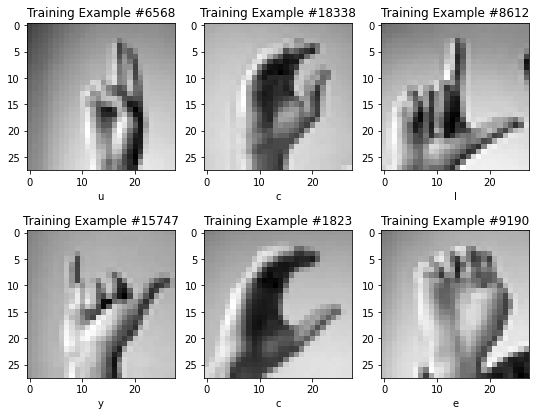

In [12]:
import random
# Shows 6 random training examples with labels
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    randindex = random.randint(0,len(np_train_img))
    plt.imshow(np_train_img[randindex],cmap='gray')
    plt.title(f"Training Example #{randindex}")
    plt.xlabel(labels_train_alphabet[randindex])
    
plt.show()

In [13]:
# This loads in the dataset. Thankfully, TensorFlow already has methods to load this dataset

#define target values
y_train = labels_train
y_test = labels_test

# Normalize input values
x_train = np_train/255. #0-1
x_test = np_test/255.

# Generate 32x32 image set for use in LeNet
cnn_x_train = x_train.reshape(-1,28,28,1) # don't know what this 1 does
cnn_x_test = x_test.reshape(-1,28,28,1)

# Resize images for use in MLP
mlp_x_train = x_train.reshape((x_train.shape[0], 784))
mlp_x_test = x_test.reshape((x_test.shape[0], 784))

In [14]:
mlp_x_train.shape

(27455, 784)

In [15]:
# Implements the network using TensorFlow.Keras
def MLPNetwork(inputDim):
    # input layer (note that batches are already taken care of for you)
    x = keras.Input(shape=(inputDim,))
    
    # subsequent dense layers
    a1 = keras.layers.Dense(512, activation='relu')(x)
    a2 = keras.layers.Dense(512, activation='relu')(a1)
    
    # classification dense layer
    logits = keras.layers.Dense(25, activation='softmax')(a2)
    
    # Creates the model given the above structure
    model = keras.Model(inputs=x, outputs=logits)
    return model

MLPmod = MLPNetwork(784)
MLPmod.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Sets up optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
MLPmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# The callback forces the network to train until it reaches 100% accuracy
hist = MLPmod.fit(mlp_x_train, y_train, epochs=10, shuffle=True)

Train on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 5s 188us/sample - loss: 1.5826 - acc: 0.4953
Epoch 2/10
27455/27455 [==============================] - 5s 171us/sample - loss: 0.5930 - acc: 0.8056
Epoch 3/10
27455/27455 [==============================] - 5s 169us/sample - loss: 0.2814 - acc: 0.9100
Epoch 4/10
27455/27455 [==============================] - 5s 173us/sample - loss: 0.1583 - acc: 0.9525
Epoch 5/10
27455/27455 [==============================] - 5s 166us/sample - loss: 0.1577 - acc: 0.9491
Epoch 6/10
27455/27455 [==============================] - 5s 177us/sample - loss: 0.0801 - acc: 0.9757
Epoch 7/10
27455/27455 [==============================] - 5s 177us/sample - loss: 0.0745 - acc: 0.9763
Epoch 8/10
27455/27455 [==============================] - 5s 173us/sample - loss: 0.0051 - acc: 0.9995
Epoch 9/10
27455/27455 [==============================] - 5s 169us/sample - loss: 0.0845 - acc: 0.9764
Epoch 10/10
27455/27455 [=========================

In [17]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = MLPmod.evaluate(mlp_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 101us/sample - loss: 0.9090 - acc: 0.7794
Test accuracy for this model is 0.7794199585914612


In [18]:
# Creates the model with LeNet architecture, first state of the art neural network
def LeNet():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    #dropout 1 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    # dropout 2
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  # more on this later
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) #access loss?
    
    return mod

# Declares the model and prepares it for training
LeNetMod = LeNet()
opt = keras.optimizers.Adam()
LeNetMod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
LeNetMod.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               3084

In [19]:
from tensorflow.keras.callbacks import History

#History allows us to access accuracy and loss values in the model
history = History() 

# Trains the network using mini-batch learning
cnnHist = LeNetMod.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 6s 294us/sample - loss: 1.7587 - acc: 0.4550 - val_loss: 0.9392 - val_acc: 0.6965
Epoch 2/20
20591/20591 [==============================] - 4s 197us/sample - loss: 0.6377 - acc: 0.7936 - val_loss: 0.3738 - val_acc: 0.8912
Epoch 3/20
20591/20591 [==============================] - 4s 192us/sample - loss: 0.2555 - acc: 0.9199 - val_loss: 0.1456 - val_acc: 0.9572
Epoch 4/20
20591/20591 [==============================] - 4s 191us/sample - loss: 0.1114 - acc: 0.9692 - val_loss: 0.0568 - val_acc: 0.9881
Epoch 5/20
20591/20591 [==============================] - 4s 194us/sample - loss: 0.0501 - acc: 0.9876 - val_loss: 0.0306 - val_acc: 0.9945
Epoch 6/20
20591/20591 [==============================] - 4s 185us/sample - loss: 0.0290 - acc: 0.9936 - val_loss: 0.0091 - val_acc: 0.9993
Epoch 7/20
20591/20591 [==============================] - 4s 195us/sample - loss: 0.0465 - acc: 0.9858 - val_lo

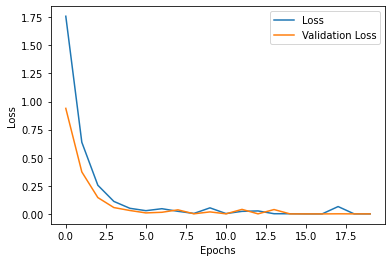

In [20]:
# cnnHist.history == dictionary with all saved loss and accuracy values
a = cnnHist.history['loss']
b = cnnHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

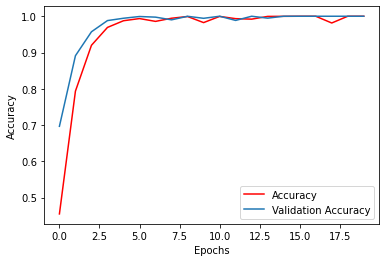

In [21]:
acc_hist = cnnHist.history['acc']
val_acc_hist = cnnHist.history['val_acc']
plt.plot(range(len(acc_hist)),acc_hist, 'r')
plt.plot(range(len(val_acc_hist)),val_acc_hist)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Validation Accuracy'])

In [22]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = LeNetMod.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 156us/sample - loss: 0.6415 - acc: 0.8788
Test accuracy for this model is 0.8788343667984009


In [23]:
# create pandas dataframe to store all model testing/training loss/acc
model_data = {'test': [],
                'training loss': [],
              'training acc': [],
              'testing loss':[],
              'testing acc': []}
model_info = pd.DataFrame(model_data)



In [24]:
#initialize data for new data frame row
new_row = {'test': ['LeNet original'],
                'training loss': [cnnHist.history['loss'][-1]],
              'training acc': [cnnHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.0,0.641477,0.878834


There are 869/7172 incorrectly labeled signs


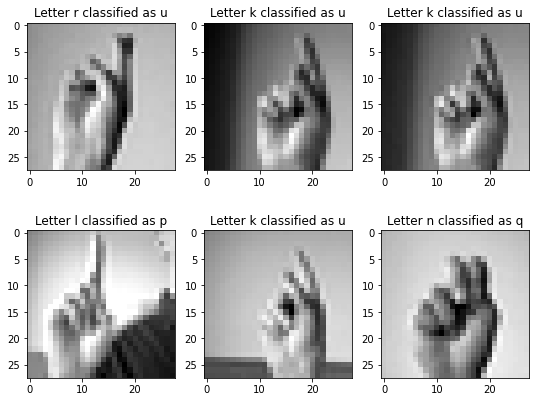

In [25]:
# Plot an incorrect value...
preds = LeNetMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1)
#convert preds to alphabetical labels
preds_alphabet = numToAlpha(preds)
incorrectPreds = np.argwhere(preds_alphabet != labels_test_alphabet)
print("There are {}/{} incorrectly labeled signs".format(incorrectPreds.shape[0],cnn_x_test.shape[0]))

plt.figure(figsize=(9,7))

for i in range(6):
    plt.subplot(2,3,i+1)
    randIncInd = np.random.choice(incorrectPreds.reshape(-1))
    plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[randIncInd], preds_alphabet[randIncInd]))
    
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

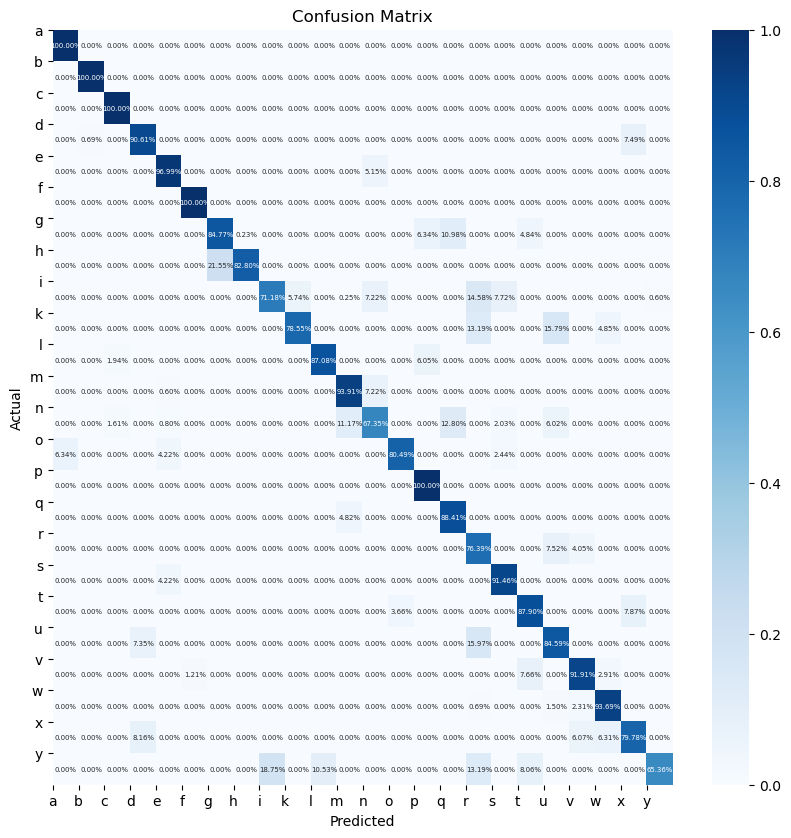

In [26]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
#define alphabet - missing j and z because those are moving signs
alphabet = ['a', 'b',  'c',  'd', 'e', 'f', 
                 'g', 'h', 'i',  'k',  'l', 
                  'm',  'n',  'o',  'p',  'q', 
                  'r', 's',  't',  'u',  'v', 
                  'w','x','y']
conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(range(len(alphabet)), alphabet)
plt.yticks(range(len(alphabet)), alphabet, rotation='horizontal')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Improvements 4-24

- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- test different optimizer (SGD) and test different loss function (categorical cross entropy)
- .ImageDataGenerator??? rotates pictures?
- hyperparameters to consider: batch size, epochs, learning rate, kernel size, activation functions?

## 4/24/21 Improvements
- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- convert numbers to A-Z for readability

## Implement VGG16 Architecture
- LeNet may be overfitting as training acc is 100% and test acc is 86%

In [27]:
# vgg = tf.keras.applications.vgg16.VGG16(
#     include_top=True, weights= None, input_tensor=None,
#     input_shape=None, pooling=None, classes=1000,
#     classifier_activation='softmax')

In [28]:
#vggmod = keras.applications.vgg16.VGG16(include_top = False, input_shape = (28,28,3))

In [29]:
# opt = keras.optimizers.Adam()
# vggmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# vggmod.summary()

In [30]:
# cnn_vgg_hist = vggmod.fit(cnn_x_train, y_train, validation_split = 0.25, 
#                        batch_size=128, epochs=5, shuffle=True, callbacks = [history])

### Implementation considerations
- image augmentation via ImageDataGenerator
- early_stopping to stop model if it is not improving 


### Trying VGG 16
- overcomplicating the problem

In [31]:
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
# input
# https://towardsdatascience.com/creating-vgg-from-scratch-using-tensorflow-a998a5640155

vgginput = Input(shape =(28,28,1)) #changed from default shape of (224,224,3)
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(vgginput)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 1024, activation ='relu')(x) #changed num units
x = Dense(units = 1024, activation ='relu')(x) #changed num units
output = Dense(units = 25, activation ='softmax')(x) #changed num units
# creating the model

vggmodel = Model (inputs=vgginput, outputs =output)
opt = keras.optimizers.Adam()
vggmodel.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vggmodel.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0   

In [32]:
vggHist = vggmodel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=5, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/5
20591/20591 [==============================] - 14s 671us/sample - loss: 3.1865 - acc: 0.0432 - val_loss: 3.1787 - val_acc: 0.0425
Epoch 2/5
20591/20591 [==============================] - 10s 464us/sample - loss: 3.1795 - acc: 0.0431 - val_loss: 3.1790 - val_acc: 0.0468
Epoch 3/5
20591/20591 [==============================] - 9s 458us/sample - loss: 3.1782 - acc: 0.0471 - val_loss: 3.1801 - val_acc: 0.0447
Epoch 4/5
20591/20591 [==============================] - 9s 451us/sample - loss: 3.1779 - acc: 0.0441 - val_loss: 3.1779 - val_acc: 0.0500
Epoch 5/5
20591/20591 [==============================] - 9s 459us/sample - loss: 3.1775 - acc: 0.0459 - val_loss: 3.1773 - val_acc: 0.0500


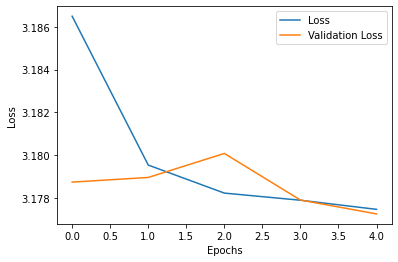

In [33]:
vggHist.history# training loss
a = vggHist.history['loss']
b = vggHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [34]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = vggmodel.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 3s 438us/sample - loss: 3.2017 - acc: 0.0229
Test accuracy for this model is 0.02286670356988907


In [35]:
#initialize data for new data frame row
new_row = {'test': ['vgg16 reshaped'],
                'training loss': [vggHist.history['loss'][-1]],
              'training acc': [vggHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index() 
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867


### Constants in testing
 - kernel size = 5x5
 - learning rate = .001
 - batch size = 50
 - epochs = 20
 - validation split = 25%
 - optimizer = opt = Adam() opt = keras.optimizers.Adam()
 - relu activation function
 - softmax activation function to classify at end of model
 - sparse_categorical_crossentropy loss model

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping( monitor = 'loss', min_delta=0.001, # minimium amount of decreasing loss to count as improvement
                                patience=10, # how many epochs to wait before stopping
                                restore_best_weights=True
                              )

## Testing Structure
- create a new CNN model
- compile model
- fit model to training data
- test model with testing data
- log accuracy, loss
- (maybe) input testing and training loss of each model in a bar graph?


### Test #1 
- add dropout layer after first pooling
- try 10% and 20% and continue on with that

In [37]:
# LeNet model with 10 % dropoout after first pooling
def testModel_1a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1a = testModel_1a()
opt = keras.optimizers.Adam()
testMod1a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1a.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0   

In [38]:
testMod1aHist = testMod1a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 223us/sample - loss: 1.8752 - acc: 0.4225 - val_loss: 1.1157 - val_acc: 0.6243
Epoch 2/20
20591/20591 [==============================] - 4s 206us/sample - loss: 0.8379 - acc: 0.7252 - val_loss: 0.5470 - val_acc: 0.8275
Epoch 3/20
20591/20591 [==============================] - 4s 218us/sample - loss: 0.4723 - acc: 0.8469 - val_loss: 0.2639 - val_acc: 0.9247
Epoch 4/20
20591/20591 [==============================] - 5s 224us/sample - loss: 0.2723 - acc: 0.9106 - val_loss: 0.1419 - val_acc: 0.9623
Epoch 5/20
20591/20591 [==============================] - 5s 219us/sample - loss: 0.1583 - acc: 0.9516 - val_loss: 0.1037 - val_acc: 0.9701
Epoch 6/20
20591/20591 [==============================] - 4s 218us/sample - loss: 0.1013 - acc: 0.9700 - val_loss: 0.0348 - val_acc: 0.9968
Epoch 7/20
20591/20591 [==============================] - 4s 210us/sample - loss: 0.0741 - acc: 0.9787 - val_lo

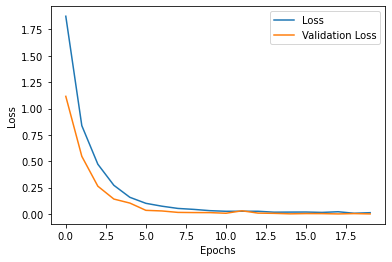

In [39]:
# testMod1aHist.history# training loss
a = testMod1aHist.history['loss']
b = testMod1aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [40]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 132us/sample - loss: 0.6577 - acc: 0.8726
Test accuracy for this model is 0.8725599646568298


In [41]:
#initialize data for new data frame row
new_row = {'test': ['1a: 10% DO'],
                'training loss': [testMod1aHist.history['loss'][-1]],
              'training acc': [testMod1aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560


In [42]:
# LeNet model with 20 % dropoout after first pooling
def testModel_1b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1b = testModel_1b()
opt = keras.optimizers.Adam()
testMod1b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1b.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0   

In [43]:
testMod1bHist = testMod1b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 228us/sample - loss: 2.0156 - acc: 0.3792 - val_loss: 1.0393 - val_acc: 0.6686
Epoch 2/20
20591/20591 [==============================] - 4s 217us/sample - loss: 0.7841 - acc: 0.7421 - val_loss: 0.4571 - val_acc: 0.8523
Epoch 3/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.3999 - acc: 0.8685 - val_loss: 0.2138 - val_acc: 0.9404
Epoch 4/20
20591/20591 [==============================] - 5s 225us/sample - loss: 0.2277 - acc: 0.9267 - val_loss: 0.0983 - val_acc: 0.9787
Epoch 5/20
20591/20591 [==============================] - 4s 218us/sample - loss: 0.1362 - acc: 0.9584 - val_loss: 0.0678 - val_acc: 0.9814
Epoch 6/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.0963 - acc: 0.9700 - val_loss: 0.0469 - val_acc: 0.9882
Epoch 7/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.0706 - acc: 0.9792 - val_lo

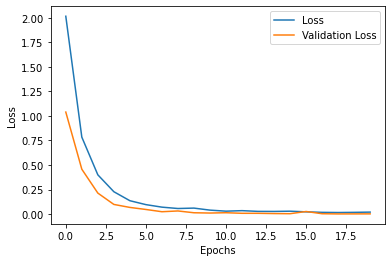

In [44]:
# testMod1bHist.history
a = testMod1bHist.history['loss']
b = testMod1bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [45]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 138us/sample - loss: 0.5109 - acc: 0.9018
Test accuracy for this model is 0.9018405079841614


In [46]:
#initialize data for new data frame row
new_row = {'test': ['1b: 20% DO'],
                'training loss': [testMod1bHist.history['loss'][-1]],
              'training acc': [testMod1bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841


### Test #2
- add dropout layer after second pooling
- try 10% and 20% and continue on with that

In [47]:
# LeNet model with 10 % dropoout after second pooling
def testModel_2a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2a = testModel_2a()
opt = keras.optimizers.Adam()
testMod2a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2a.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0   

In [48]:
testMod2aHist = testMod2a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 241us/sample - loss: 1.9004 - acc: 0.4094 - val_loss: 0.8859 - val_acc: 0.7040
Epoch 2/20
20591/20591 [==============================] - 5s 227us/sample - loss: 0.6798 - acc: 0.7773 - val_loss: 0.3556 - val_acc: 0.8926
Epoch 3/20
20591/20591 [==============================] - 5s 228us/sample - loss: 0.3256 - acc: 0.8918 - val_loss: 0.1731 - val_acc: 0.9477
Epoch 4/20
20591/20591 [==============================] - 5s 228us/sample - loss: 0.1822 - acc: 0.9407 - val_loss: 0.1014 - val_acc: 0.9682
Epoch 5/20
20591/20591 [==============================] - 4s 217us/sample - loss: 0.1216 - acc: 0.9617 - val_loss: 0.0387 - val_acc: 0.9921
Epoch 6/20
20591/20591 [==============================] - 5s 224us/sample - loss: 0.0899 - acc: 0.9698 - val_loss: 0.0391 - val_acc: 0.9899
Epoch 7/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.0728 - acc: 0.9757 - val_lo

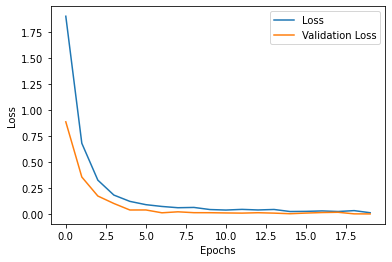

In [49]:
a = testMod2aHist.history['loss']
b = testMod2aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [50]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 155us/sample - loss: 0.7185 - acc: 0.8783
Test accuracy for this model is 0.8782766461372375


In [51]:
#initialize data for new data frame row
new_row = {'test': ['2a: 10% DO'],
                'training loss': [testMod2aHist.history['loss'][-1]],
              'training acc': [testMod2aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277


In [52]:
# LeNet model with 20 % dropoout after second pooling
def testModel_2b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2b = testModel_2b()
opt = keras.optimizers.Adam()
testMod2b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2b.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0   

In [53]:
testMod2bHist = testMod2b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 229us/sample - loss: 1.9101 - acc: 0.4054 - val_loss: 0.9180 - val_acc: 0.7130
Epoch 2/20
20591/20591 [==============================] - 4s 218us/sample - loss: 0.7852 - acc: 0.7399 - val_loss: 0.4568 - val_acc: 0.8502
Epoch 3/20
20591/20591 [==============================] - 4s 218us/sample - loss: 0.4477 - acc: 0.8496 - val_loss: 0.2111 - val_acc: 0.9443
Epoch 4/20
20591/20591 [==============================] - 5s 220us/sample - loss: 0.2898 - acc: 0.9040 - val_loss: 0.1155 - val_acc: 0.9717
Epoch 5/20
20591/20591 [==============================] - 4s 214us/sample - loss: 0.1865 - acc: 0.9390 - val_loss: 0.0583 - val_acc: 0.9914
Epoch 6/20
20591/20591 [==============================] - 4s 218us/sample - loss: 0.1415 - acc: 0.9541 - val_loss: 0.0396 - val_acc: 0.9934
Epoch 7/20
20591/20591 [==============================] - 4s 217us/sample - loss: 0.1192 - acc: 0.9614 - val_lo

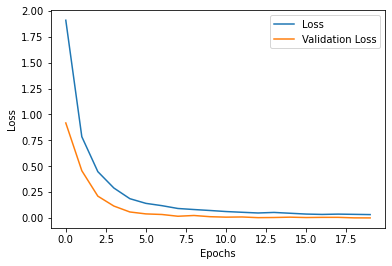

In [54]:
a = testMod2bHist.history['loss']
b = testMod2bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [55]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 136us/sample - loss: 0.3843 - acc: 0.8996
Test accuracy for this model is 0.8996095657348633


In [56]:
#initialize data for new data frame row
new_row = {'test': ['2b: 20% DO'],
                'training loss': [testMod2bHist.history['loss'][-1]],
              'training acc': [testMod2bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610


### Test #3
- add both dropout layers together

In [57]:
# LeNet model with 10 % dropoout after second pooling
def testModel_3():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod3 = testModel_3()
opt = keras.optimizers.Adam()
testMod3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 16)          0   

In [58]:
testMod3Hist = testMod3.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 239us/sample - loss: 2.0681 - acc: 0.3654 - val_loss: 1.0312 - val_acc: 0.6925
Epoch 2/20
20591/20591 [==============================] - 4s 208us/sample - loss: 0.8300 - acc: 0.7294 - val_loss: 0.3891 - val_acc: 0.8971
Epoch 3/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.4533 - acc: 0.8469 - val_loss: 0.2070 - val_acc: 0.9419
Epoch 4/20
20591/20591 [==============================] - 5s 223us/sample - loss: 0.2847 - acc: 0.9037 - val_loss: 0.0933 - val_acc: 0.9821
Epoch 5/20
20591/20591 [==============================] - 5s 221us/sample - loss: 0.2092 - acc: 0.9274 - val_loss: 0.0776 - val_acc: 0.9854
Epoch 6/20
20591/20591 [==============================] - 5s 223us/sample - loss: 0.1538 - acc: 0.9478 - val_loss: 0.0467 - val_acc: 0.9899
Epoch 7/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.1235 - acc: 0.9571 - val_lo

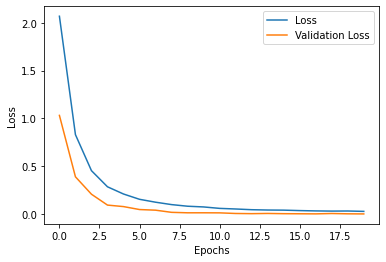

In [59]:
a = testMod3Hist.history['loss']
b = testMod3Hist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [60]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod3.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 143us/sample - loss: 0.3275 - acc: 0.9236
Test accuracy for this model is 0.9235917329788208


In [61]:
#initialize data for new data frame row
new_row = {'test': ['3: 2 DO layers'],
                'training loss': [testMod3Hist.history['loss'][-1]],
              'training acc': [testMod3Hist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592


### Best performance so far is with 2b - 20% dropout after second convolution and pooling
### now test removing dense layers

### Test #4
- remove dense layer 1 and 2 
- combine best w/ 2b

In [62]:
# LeNet model with one less dense layer
def testModel_4a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
#   out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4a = testModel_4a()
opt = keras.optimizers.Adam()
testMod4a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4a.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 84)                2158

In [63]:
testMod4aHist = testMod4a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 209us/sample - loss: 2.0373 - acc: 0.3908 - val_loss: 1.1830 - val_acc: 0.6356
Epoch 2/20
20591/20591 [==============================] - 4s 195us/sample - loss: 0.8040 - acc: 0.7469 - val_loss: 0.5852 - val_acc: 0.8137
Epoch 3/20
20591/20591 [==============================] - 4s 196us/sample - loss: 0.4031 - acc: 0.8736 - val_loss: 0.3042 - val_acc: 0.9111
Epoch 4/20
20591/20591 [==============================] - 4s 202us/sample - loss: 0.2136 - acc: 0.9376 - val_loss: 0.1631 - val_acc: 0.9486
Epoch 5/20
20591/20591 [==============================] - 4s 199us/sample - loss: 0.1146 - acc: 0.9723 - val_loss: 0.0858 - val_acc: 0.9763
Epoch 6/20
20591/20591 [==============================] - 4s 198us/sample - loss: 0.0606 - acc: 0.9882 - val_loss: 0.0371 - val_acc: 0.9952
Epoch 7/20
20591/20591 [==============================] - 4s 188us/sample - loss: 0.0346 - acc: 0.9945 - val_lo

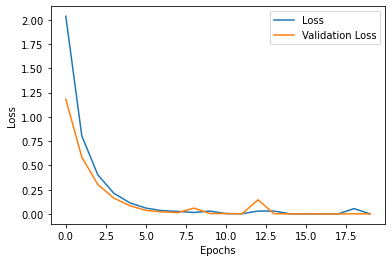

In [64]:
a = testMod4aHist.history['loss']
b = testMod4aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [65]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 136us/sample - loss: 0.5431 - acc: 0.8741
Test accuracy for this model is 0.8740937113761902


In [66]:
#initialize data for new data frame row
new_row = {'test': ['4a: remove 120 dense'],
                'training loss': [testMod4aHist.history['loss'][-1]],
              'training acc': [testMod4aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094


In [67]:
# LeNet model with one less dense layer
def testModel_4b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4b = testModel_4b()
opt = keras.optimizers.Adam()
testMod4b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4b.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 120)               3084

In [68]:
testMod4bHist = testMod4b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 222us/sample - loss: 1.7249 - acc: 0.4877 - val_loss: 0.9264 - val_acc: 0.7015
Epoch 2/20
20591/20591 [==============================] - 4s 203us/sample - loss: 0.6179 - acc: 0.8043 - val_loss: 0.3861 - val_acc: 0.8785
Epoch 3/20
20591/20591 [==============================] - 4s 197us/sample - loss: 0.2847 - acc: 0.9145 - val_loss: 0.2222 - val_acc: 0.9305
Epoch 4/20
20591/20591 [==============================] - 4s 202us/sample - loss: 0.1331 - acc: 0.9668 - val_loss: 0.1014 - val_acc: 0.9763
Epoch 5/20
20591/20591 [==============================] - 4s 198us/sample - loss: 0.0680 - acc: 0.9867 - val_loss: 0.0401 - val_acc: 0.9949
Epoch 6/20
20591/20591 [==============================] - 4s 200us/sample - loss: 0.0371 - acc: 0.9935 - val_loss: 0.0242 - val_acc: 0.9964
Epoch 7/20
20591/20591 [==============================] - 4s 201us/sample - loss: 0.0200 - acc: 0.9977 - val_lo

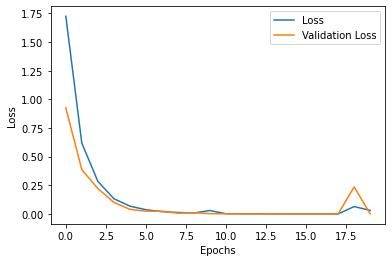

In [69]:
a = testMod4bHist.history['loss']
b = testMod4bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [70]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 137us/sample - loss: 0.5700 - acc: 0.8738
Test accuracy for this model is 0.8738148212432861


In [71]:
#initialize data for new data frame row
new_row = {'test': ['4b: remove 84 dense'],
                'training loss': [testMod4bHist.history['loss'][-1]],
              'training acc': [testMod4bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815


In [72]:
# LeNet model with one less dense layer and 20% dropout after second pooling
def testModel_4c():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4c = testModel_4c()
opt = keras.optimizers.Adam()
testMod4c.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4c.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_17 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0  

In [73]:
testMod4cHist = testMod4c.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 233us/sample - loss: 1.8947 - acc: 0.4162 - val_loss: 0.8915 - val_acc: 0.7413
Epoch 2/20
20591/20591 [==============================] - 4s 214us/sample - loss: 0.7903 - acc: 0.7371 - val_loss: 0.4317 - val_acc: 0.8518
Epoch 3/20
20591/20591 [==============================] - 4s 215us/sample - loss: 0.4703 - acc: 0.8425 - val_loss: 0.2219 - val_acc: 0.9371
Epoch 4/20
20591/20591 [==============================] - 4s 217us/sample - loss: 0.3102 - acc: 0.8940 - val_loss: 0.1521 - val_acc: 0.9567
Epoch 5/20
20591/20591 [==============================] - 4s 214us/sample - loss: 0.2214 - acc: 0.9277 - val_loss: 0.0890 - val_acc: 0.9789
Epoch 6/20
20591/20591 [==============================] - 4s 211us/sample - loss: 0.1607 - acc: 0.9487 - val_loss: 0.0487 - val_acc: 0.9899
Epoch 7/20
20591/20591 [==============================] - 4s 215us/sample - loss: 0.1364 - acc: 0.9561 - val_lo

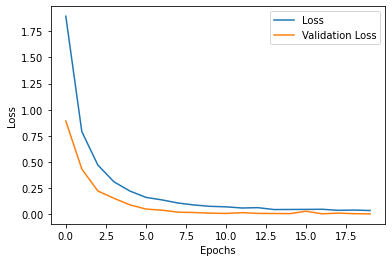

In [74]:
a = testMod4cHist.history['loss']
b = testMod4cHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [75]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4c.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 140us/sample - loss: 0.3908 - acc: 0.9024
Test accuracy for this model is 0.9023982286453247


In [76]:
#initialize data for new data frame row
new_row = {'test': ['4c: remove 84 dense, add 20% DO'],
                'training loss': [testMod4cHist.history['loss'][-1]],
              'training acc': [testMod4cHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815
9,"4c: remove 84 dense, add 20% DO",0.034731,0.988733,0.390826,0.902398


## combination of dropped dense layer and dropout not as good as dropout alone

### Test #5
- add extra convolution layer before pooling
- combine it with dropout
- combine with dropout and dense layer missing

In [77]:
# LeNet model with additional convolution layer
def testModel_5a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5a = testModel_5a()
opt = keras.optimizers.Adam()
testMod5a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5a.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_19 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0  

In [78]:
testMod5aHist = testMod5a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 267us/sample - loss: 1.7205 - acc: 0.4531 - val_loss: 0.8918 - val_acc: 0.7003
Epoch 2/20
20591/20591 [==============================] - 5s 227us/sample - loss: 0.5486 - acc: 0.8129 - val_loss: 0.3173 - val_acc: 0.8973
Epoch 3/20
20591/20591 [==============================] - 5s 228us/sample - loss: 0.2339 - acc: 0.9225 - val_loss: 0.1495 - val_acc: 0.9484
Epoch 4/20
20591/20591 [==============================] - 5s 229us/sample - loss: 0.1051 - acc: 0.9665 - val_loss: 0.0913 - val_acc: 0.9671
Epoch 5/20
20591/20591 [==============================] - 5s 232us/sample - loss: 0.0689 - acc: 0.9779 - val_loss: 0.0288 - val_acc: 0.9933
Epoch 6/20
20591/20591 [==============================] - 5s 230us/sample - loss: 0.0693 - acc: 0.9785 - val_loss: 0.0090 - val_acc: 0.9996
Epoch 7/20
20591/20591 [==============================] - 5s 227us/sample - loss: 0.0221 - acc: 0.9941 - val_lo

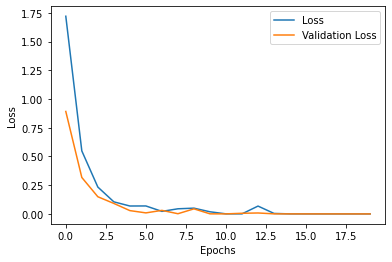

In [79]:
a = testMod5aHist.history['loss']
b = testMod5aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [80]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 168us/sample - loss: 0.9607 - acc: 0.8667
Test accuracy for this model is 0.8667038679122925


In [81]:
#initialize data for new data frame row
new_row = {'test': ['5a: Add Conv 32 out'],
                'training loss': [testMod5aHist.history['loss'][-1]],
              'training acc': [testMod5aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815
9,"4c: remove 84 dense, add 20% DO",0.034731,0.988733,0.390826,0.902398


In [82]:
#5b combine convolutional layer with 20 %dropout
# LeNet model with additional convolution layer
def testModel_5b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5b = testModel_5b()
opt = keras.optimizers.Adam()
testMod5b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5b.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_20 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_21 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 2, 32)          0  

In [83]:
testMod5bHist = testMod5b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 266us/sample - loss: 2.2068 - acc: 0.3023 - val_loss: 1.2236 - val_acc: 0.5972
Epoch 2/20
20591/20591 [==============================] - 5s 229us/sample - loss: 1.1434 - acc: 0.6142 - val_loss: 0.6363 - val_acc: 0.8205
Epoch 3/20
20591/20591 [==============================] - 5s 234us/sample - loss: 0.7680 - acc: 0.7355 - val_loss: 0.3932 - val_acc: 0.8733
Epoch 4/20
20591/20591 [==============================] - 5s 240us/sample - loss: 0.5746 - acc: 0.7991 - val_loss: 0.2577 - val_acc: 0.9234
Epoch 5/20
20591/20591 [==============================] - 5s 238us/sample - loss: 0.4489 - acc: 0.8444 - val_loss: 0.1876 - val_acc: 0.9398
Epoch 6/20
20591/20591 [==============================] - 5s 235us/sample - loss: 0.3553 - acc: 0.8774 - val_loss: 0.1177 - val_acc: 0.9671
Epoch 7/20
20591/20591 [==============================] - 5s 237us/sample - loss: 0.2896 - acc: 0.8985 - val_lo

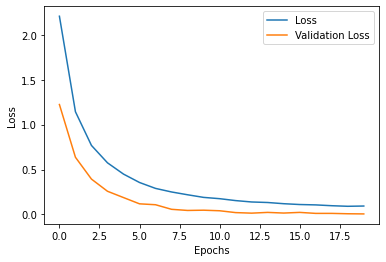

In [84]:
a = testMod5bHist.history['loss']
b = testMod5bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [85]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 156us/sample - loss: 0.3414 - acc: 0.8804
Test accuracy for this model is 0.8803681135177612


In [86]:
#initialize data for new data frame row
new_row = {'test': ['5b: Add Conv 32 out and 20% DO'],
                'training loss': [testMod5bHist.history['loss'][-1]],
              'training acc': [testMod5bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815
9,"4c: remove 84 dense, add 20% DO",0.034731,0.988733,0.390826,0.902398


### Test #6
- add image augmentation
- different levels of rotation/scaling?

In [87]:
# use keras preprocessing to apply random image manipulations and increase model especially as it relates to location
# and rotation invariance
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
augmentedData = ImageDataGenerator(rotation_range= 10, # randomly rotate images in the range 5 degrees 
                                   zoom_range = 0.1, # Randomly zoom image 10% 
                                   width_shift_range=0.1, # randomly shift images horizontally 10%
                                   height_shift_range=0.1, # randomly shift images vertically 10% 
                                   shear_range = 0.1) #randomly distorts/shears image, value affects intensity
augmentedData.fit(cnn_x_train)
train_generator = augmentedData.flow(cnn_x_train,y_train, batch_size = 50)



In [88]:
#Original LeNet model w/ data augmentation
def testModel_6a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6a = testModel_6a()
opt = keras.optimizers.Adam()
testMod6a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6a.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_23 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 120)               308

In [89]:
#using test data as validation data because image data generator does not allow simple validation split
testMod6aHist = testMod6a.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=20, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 11s 20ms/step - loss: 2.1811 - acc: 0.3293 - val_loss: 1.1727 - val_acc: 0.6134
Epoch 2/20
550/550 [==============================] - 10s 18ms/step - loss: 1.2083 - acc: 0.6032 - val_loss: 0.7532 - val_acc: 0.7462
Epoch 3/20
550/550 [==============================] - 10s 18ms/step - loss: 0.8649 - acc: 0.7114 - val_loss: 0.5388 - val_acc: 0.8090
Epoch 4/20
550/550 [==============================] - 10s 18ms/step - loss: 0.6618 - acc: 0.7793 - val_loss: 0.4315 - val_acc: 0.8496
Epoch 5/20
550/550 [==============================] - 10s 19ms/step - loss: 0.5295 - acc: 0.8239 - val_loss: 0.3281 - val_acc: 0.8981
Epoch 6/20
550/550 [==============================] - 10s 18ms/step - loss: 0.4312 - acc: 0.8544 - val_loss: 0.2660 - val_acc: 0.9123
Epoch 7/20
550/550 [==============================] - 10s 18ms/step - loss: 0.3393 - acc: 0.8860 - val_loss: 0.2007 - val_acc: 0.9327
Epoch 8/20
550/550 [==============================] - 10s 18ms

550/550 [==============================] - 10s 19ms/step - loss: 0.1589 - acc: 0.9470 - val_loss: 0.1511 - val_acc: 0.9402
Epoch 14/20
550/550 [==============================] - 10s 19ms/step - loss: 0.1534 - acc: 0.9490 - val_loss: 0.0865 - val_acc: 0.9706
Epoch 15/20
550/550 [==============================] - 10s 18ms/step - loss: 0.1336 - acc: 0.9560 - val_loss: 0.0784 - val_acc: 0.9679
Epoch 16/20
550/550 [==============================] - 10s 17ms/step - loss: 0.1186 - acc: 0.9614 - val_loss: 0.0932 - val_acc: 0.9658
Epoch 17/20
550/550 [==============================] - 10s 19ms/step - loss: 0.1113 - acc: 0.9631 - val_loss: 0.0697 - val_acc: 0.9714
Epoch 18/20
550/550 [==============================] - 11s 19ms/step - loss: 0.1041 - acc: 0.9657 - val_loss: 0.0903 - val_acc: 0.9760
Epoch 19/20
550/550 [==============================] - 10s 19ms/step - loss: 0.0944 - acc: 0.9684 - val_loss: 0.0440 - val_acc: 0.9891
Epoch 20/20
550/550 [==============================] - 11s 19ms/ste

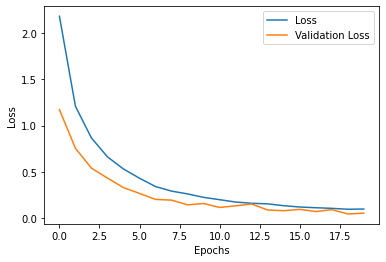

In [90]:
# testMod2aHist.history# training loss
a = testMod6aHist.history['loss']
b = testMod6aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [91]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 145us/sample - loss: 0.0512 - acc: 0.9799
Test accuracy for this model is 0.9799219369888306


In [92]:
#initialize data for new data frame row
new_row = {'test': ['6a: Add Image Aug'],
                'training loss': [testMod6aHist.history['loss'][-1]],
              'training acc': [testMod6aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815
9,"4c: remove 84 dense, add 20% DO",0.034731,0.988733,0.390826,0.902398


In [93]:
#Original LeNet model w/ data augmentation and dropout layer
def testModel_6b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6b = testModel_6b()
opt = keras.optimizers.Adam()
testMod6b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6b.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_24 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_25 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 256)               0  

In [94]:
testMod6bHist = testMod6b.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=20, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 11s 20ms/step - loss: 2.2403 - acc: 0.3082 - val_loss: 1.1472 - val_acc: 0.6432
Epoch 2/20
550/550 [==============================] - 11s 19ms/step - loss: 1.2922 - acc: 0.5740 - val_loss: 0.7669 - val_acc: 0.7426
Epoch 3/20
550/550 [==============================] - 10s 19ms/step - loss: 0.9385 - acc: 0.6826 - val_loss: 0.5904 - val_acc: 0.8160
Epoch 4/20
550/550 [==============================] - 11s 19ms/step - loss: 0.7556 - acc: 0.7469 - val_loss: 0.4502 - val_acc: 0.8519
Epoch 5/20
550/550 [==============================] - 11s 20ms/step - loss: 0.6085 - acc: 0.7926 - val_loss: 0.3947 - val_acc: 0.8595
Epoch 6/20
550/550 [==============================] - 11s 19ms/step - loss: 0.5222 - acc: 0.8223 - val_loss: 0.2703 - val_acc: 0.9113
Epoch 7/20
550/550 [==============================] - 11s 19ms/step - loss: 0.4439 - acc: 0.8476 - val_loss: 0.2455 - val_acc: 0.9130
Epoch 8/20
550/550 [==============================] - 11s 20ms

550/550 [==============================] - 11s 19ms/step - loss: 0.2344 - acc: 0.9200 - val_loss: 0.0964 - val_acc: 0.9692
Epoch 14/20
550/550 [==============================] - 11s 19ms/step - loss: 0.2124 - acc: 0.9273 - val_loss: 0.0950 - val_acc: 0.9759
Epoch 15/20
550/550 [==============================] - 11s 20ms/step - loss: 0.1973 - acc: 0.9335 - val_loss: 0.0878 - val_acc: 0.9696
Epoch 16/20
550/550 [==============================] - 11s 19ms/step - loss: 0.1884 - acc: 0.9363 - val_loss: 0.0558 - val_acc: 0.9883
Epoch 17/20
550/550 [==============================] - 11s 19ms/step - loss: 0.1742 - acc: 0.9421 - val_loss: 0.0688 - val_acc: 0.9803
Epoch 18/20
550/550 [==============================] - 10s 19ms/step - loss: 0.1669 - acc: 0.9439 - val_loss: 0.1001 - val_acc: 0.9689
Epoch 19/20
550/550 [==============================] - 11s 20ms/step - loss: 0.1619 - acc: 0.9458 - val_loss: 0.0746 - val_acc: 0.9734
Epoch 20/20
550/550 [==============================] - 11s 20ms/ste

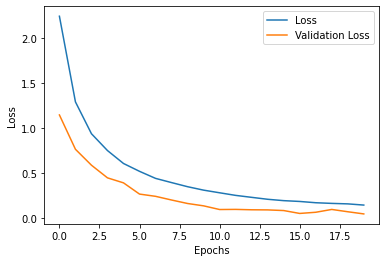

In [95]:
# testMod2aHist.history# training loss
a = testMod6bHist.history['loss']
b = testMod6bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [96]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 139us/sample - loss: 0.0506 - acc: 0.9816
Test accuracy for this model is 0.9815950989723206


In [97]:
#initialize data for new data frame row
new_row = {'test': ['6b: Add Image Aug and 20% DO'],
                'training loss': [testMod6bHist.history['loss'][-1]],
              'training acc': [testMod6bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815
9,"4c: remove 84 dense, add 20% DO",0.034731,0.988733,0.390826,0.902398


### image augmentation alone performed better than with the dropout layer ~1%

- loss in image augmentation is very high compared to dropout

### Test #7
- test hyper parameters
- learning rate, dropout rate, batch size, epochs, validation split, kernel size,
- test SGD vs Adam

In [98]:
#7a
# LeNet model with 10x learning
def testModel_7a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7a = testModel_7a()
opt = keras.optimizers.Adam(learning_rate=0.01) #10x learning rate 0.001 -> 0.01
testMod7a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7a.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_26 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_27 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 128)               0  

In [99]:
testMod7aHist = testMod7a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 266us/sample - loss: 1.8120 - acc: 0.3936 - val_loss: 1.1108 - val_acc: 0.6100
Epoch 2/20
20591/20591 [==============================] - 5s 235us/sample - loss: 0.7372 - acc: 0.7337 - val_loss: 0.5002 - val_acc: 0.8078
Epoch 3/20
20591/20591 [==============================] - 5s 235us/sample - loss: 0.3680 - acc: 0.8698 - val_loss: 0.2348 - val_acc: 0.9168
Epoch 4/20
20591/20591 [==============================] - 5s 237us/sample - loss: 0.2590 - acc: 0.9119 - val_loss: 0.3580 - val_acc: 0.8775
Epoch 5/20
20591/20591 [==============================] - 5s 225us/sample - loss: 0.2230 - acc: 0.9248 - val_loss: 0.1656 - val_acc: 0.9416
Epoch 6/20
20591/20591 [==============================] - 5s 224us/sample - loss: 0.1989 - acc: 0.9381 - val_loss: 0.0683 - val_acc: 0.9781
Epoch 7/20
20591/20591 [==============================] - 5s 223us/sample - loss: 0.1318 - acc: 0.9560 - val_lo

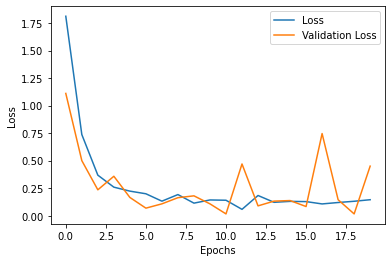

In [100]:
a = testMod7aHist.history['loss']
b = testMod7aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [101]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 162us/sample - loss: 3.0426 - acc: 0.6358
Test accuracy for this model is 0.6358059048652649


In [102]:
#initialize data for new data frame row
new_row = {'test': ['7a: 10x LR'],
                'training loss': [testMod7aHist.history['loss'][-1]],
              'training acc': [testMod7aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815
9,"4c: remove 84 dense, add 20% DO",0.034731,0.988733,0.390826,0.902398


In [103]:
#7b
# LeNet model with 3x3 kernel instead of 5x5
def testModel_7b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7b = testModel_7b()
opt = keras.optimizers.Adam() 
testMod7b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7b.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_28 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 9, 9, 32)          4640      
_________________________________________________________________
average_pooling2d_29 (Averag (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0  

In [104]:
testMod7bHist = testMod7b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 7s 327us/sample - loss: 1.7508 - acc: 0.4469 - val_loss: 0.8495 - val_acc: 0.7261
Epoch 2/20
20591/20591 [==============================] - 5s 230us/sample - loss: 0.4715 - acc: 0.8487 - val_loss: 0.2066 - val_acc: 0.9280
Epoch 3/20
20591/20591 [==============================] - 5s 230us/sample - loss: 0.1345 - acc: 0.9596 - val_loss: 0.0857 - val_acc: 0.9764
Epoch 4/20
20591/20591 [==============================] - 5s 232us/sample - loss: 0.0501 - acc: 0.9872 - val_loss: 0.0097 - val_acc: 1.0000
Epoch 5/20
20591/20591 [==============================] - 5s 239us/sample - loss: 0.0277 - acc: 0.9928 - val_loss: 0.0517 - val_acc: 0.9851
Epoch 6/20
20591/20591 [==============================] - 5s 233us/sample - loss: 0.0219 - acc: 0.9940 - val_loss: 0.0052 - val_acc: 0.9993
Epoch 7/20
20591/20591 [==============================] - 5s 226us/sample - loss: 0.0164 - acc: 0.9949 - val_lo

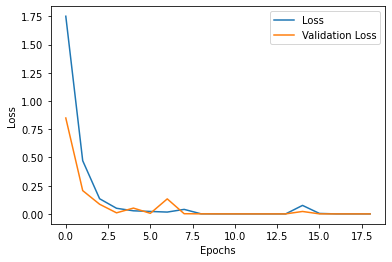

In [105]:
a = testMod7bHist.history['loss']
b = testMod7bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [106]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 2s 219us/sample - loss: 0.6083 - acc: 0.8925
Test accuracy for this model is 0.8924986124038696


In [107]:
#initialize data for new data frame row
new_row = {'test': ['7b: 3x3 kernel'],
                'training loss': [testMod7bHist.history['loss'][-1]],
              'training acc': [testMod7bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815
9,"4c: remove 84 dense, add 20% DO",0.034731,0.988733,0.390826,0.902398


In [108]:
#7a
# LeNet model with 3x3 kernel instead of 5x5 and additional dropout layer
def testModel_7c():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7c = testModel_7c()
opt = keras.optimizers.Adam() 
testMod7c.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7c.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_30 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 9, 9, 32)          4640      
_________________________________________________________________
average_pooling2d_31 (Averag (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 32)          0  

In [109]:
testMod7cHist = testMod7c.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 6s 279us/sample - loss: 1.7675 - acc: 0.4463 - val_loss: 0.7710 - val_acc: 0.7568
Epoch 2/20
20591/20591 [==============================] - 5s 250us/sample - loss: 0.5216 - acc: 0.8256 - val_loss: 0.1904 - val_acc: 0.9515
Epoch 3/20
20591/20591 [==============================] - 5s 243us/sample - loss: 0.2146 - acc: 0.9296 - val_loss: 0.0621 - val_acc: 0.9911
Epoch 4/20
20591/20591 [==============================] - 5s 250us/sample - loss: 0.1110 - acc: 0.9653 - val_loss: 0.0347 - val_acc: 0.9929
Epoch 5/20
20591/20591 [==============================] - 5s 246us/sample - loss: 0.0771 - acc: 0.9755 - val_loss: 0.0182 - val_acc: 0.9968
Epoch 6/20
20591/20591 [==============================] - 5s 250us/sample - loss: 0.0534 - acc: 0.9829 - val_loss: 0.0093 - val_acc: 0.9999
Epoch 7/20
20591/20591 [==============================] - 5s 243us/sample - loss: 0.0422 - acc: 0.9868 - val_lo

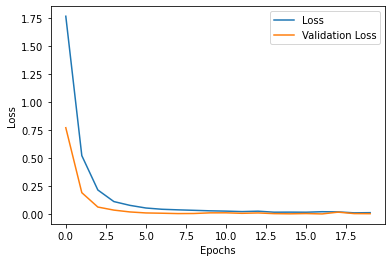

In [110]:
a = testMod7cHist.history['loss']
b = testMod7cHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [111]:
# Evaluate the trained network on the testing dataset
# slightly better than 5x5 with dropout - change to use 3x3
testLoss, testAcc = testMod7c.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 164us/sample - loss: 0.4437 - acc: 0.9162
Test accuracy for this model is 0.9162018895149231


In [112]:
#initialize data for new data frame row
new_row = {'test': ['7b: 3x3 kernel and 20% DO'],
                'training loss': [testMod7cHist.history['loss'][-1]],
              'training acc': [testMod7cHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815
9,"4c: remove 84 dense, add 20% DO",0.034731,0.988733,0.390826,0.902398


# automating hyperparameter testing

- test batch sizes from 50- batch_size_lst = linspace(50,250,15)
- test learning rate range from 0.001 to 0.01
- test dropout rate linspace(10,30,5)

4/25
- test validation split from 15-30 %
- test epochs 20-60

save value of hyperparameter that gives highest acc (use argmax)

accidentally included additional convolution layer in hyperparameter testing which would theoretically decrease accuracy


In [113]:
#set up hyperparameter lists to loop through
batch_size_range = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
dropout_rate_range = [0.1, 0.2, 0.3] #10-30% last
learning_rate_range = [0.0010, 0.003, 0.005, 0.007, 0.01]
validation_split_range = [0.15,0.20,0.25,0.30, 0.35]
epoch_range = [20,30,40,50,60]
loss = 'sparse_categorical_crossentropy'

In [114]:
# test 8
# LeNet model with adjustable drop out rate for loop
def testModel_HyperParamLoop(dropout_rate = 0.2):
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = dropout_rate)(out) # updates every loop
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

In [115]:
#optimize batch size
batch_accuracies = {}

for batch_size in batch_size_range: 
    tempModel = testModel_HyperParamLoop() #create temporary model with default dropout 0.2
    opt = keras.optimizers.Adam()
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size= batch_size, epochs=20, shuffle=True, callbacks = [early_stopping, history]) 
                            # testing range of batch sizes
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    batch_accuracies[batch_size] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 11s 517us/sample - loss: 1.4640 - acc: 0.5381 - val_loss: 0.4538 - val_acc: 0.8454
Epoch 2/20
20591/20591 [==============================] - 9s 437us/sample - loss: 0.3130 - acc: 0.8926 - val_loss: 0.0896 - val_acc: 0.9763
Epoch 3/20
20591/20591 [==============================] - 9s 446us/sample - loss: 0.1258 - acc: 0.9572 - val_loss: 0.0467 - val_acc: 0.9911
Epoch 4/20
20591/20591 [==============================] - 10s 462us/sample - loss: 0.0728 - acc: 0.9766 - val_loss: 0.0926 - val_acc: 0.9674
Epoch 5/20
20591/20591 [==============================] - 9s 457us/sample - loss: 0.0560 - acc: 0.9825 - val_loss: 0.0081 - val_acc: 0.9994
Epoch 6/20
20591/20591 [==============================] - 9s 458us/sample - loss: 0.0401 - acc: 0.9861 - val_loss: 0.0190 - val_acc: 0.9937
Epoch 7/20
20591/20591 [==============================] - 9s 455us/sample - loss: 0.0352 - acc: 0.9880 - val_

Epoch 16/20
20591/20591 [==============================] - 4s 182us/sample - loss: 0.0255 - acc: 0.9917 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 17/20
20591/20591 [==============================] - 4s 182us/sample - loss: 0.0210 - acc: 0.9932 - val_loss: 0.0016 - val_acc: 0.9999
Epoch 18/20
20591/20591 [==============================] - 4s 184us/sample - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0021 - val_acc: 0.9999
Epoch 19/20
20591/20591 [==============================] - 4s 181us/sample - loss: 0.0127 - acc: 0.9962 - val_loss: 8.4364e-04 - val_acc: 1.0000
Epoch 20/20
7172/7172 [==============================] - 1s 180us/sample - loss: 0.6004 - acc: 0.8879
Test accuracy for this model is 0.8878973722457886
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 238us/sample - loss: 2.2513 - acc: 0.3106 - val_loss: 1.2594 - val_acc: 0.5793
Epoch 2/20
20591/20591 [==============================] - 3s 138us/sample - loss: 0.9936 -

20591/20591 [==============================] - 1s 70us/sample - loss: 0.4963 - acc: 0.8343 - val_loss: 0.2573 - val_acc: 0.9360
Epoch 5/20
20591/20591 [==============================] - 2s 73us/sample - loss: 0.3063 - acc: 0.8973 - val_loss: 0.1699 - val_acc: 0.9556
Epoch 6/20
20591/20591 [==============================] - 2s 74us/sample - loss: 0.2097 - acc: 0.9323 - val_loss: 0.0899 - val_acc: 0.9786
Epoch 7/20
20591/20591 [==============================] - 2s 73us/sample - loss: 0.1540 - acc: 0.9532 - val_loss: 0.0817 - val_acc: 0.9774
Epoch 8/20
20591/20591 [==============================] - 1s 72us/sample - loss: 0.1135 - acc: 0.9642 - val_loss: 0.0469 - val_acc: 0.9891
Epoch 9/20
20591/20591 [==============================] - 2s 74us/sample - loss: 0.0822 - acc: 0.9767 - val_loss: 0.0326 - val_acc: 0.9933
Epoch 10/20
20591/20591 [==============================] - 1s 72us/sample - loss: 0.0717 - acc: 0.9778 - val_loss: 0.0178 - val_acc: 0.9971
Epoch 11/20
20591/20591 [============

7172/7172 [==============================] - 1s 196us/sample - loss: 0.3173 - acc: 0.9067
Test accuracy for this model is 0.9067205786705017
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 143us/sample - loss: 2.8596 - acc: 0.1494 - val_loss: 1.9829 - val_acc: 0.3926
Epoch 2/20
20591/20591 [==============================] - 1s 58us/sample - loss: 1.6647 - acc: 0.4693 - val_loss: 1.2300 - val_acc: 0.6227
Epoch 3/20
20591/20591 [==============================] - 1s 59us/sample - loss: 1.0946 - acc: 0.6500 - val_loss: 0.8032 - val_acc: 0.7487
Epoch 4/20
20591/20591 [==============================] - 1s 58us/sample - loss: 0.7514 - acc: 0.7526 - val_loss: 0.5427 - val_acc: 0.8209
Epoch 5/20
20591/20591 [==============================] - 1s 59us/sample - loss: 0.5209 - acc: 0.8271 - val_loss: 0.3240 - val_acc: 0.9056
Epoch 6/20
20591/20591 [==============================] - 1s 60us/sample - loss: 0.3710 - acc: 0.8801 - val_loss: 

In [116]:
def GetKey(acc_dict,val):
    for key, value in acc_dict.items():
        if val == value[1]:
            return key

In [117]:
# get optimal batch size via max test accuracy
# print(batch_accuracies)
max_test_acc = max(batch_accuracies.values())[1]
optimal_batch_size = GetKey(batch_accuracies, max_test_acc)
print('Optimal batch size is {}'.format(optimal_batch_size) )

Optimal batch size is 150


In [118]:
# optimize learning rate
learning_rates = {}

for learning_rate in learning_rate_range: 
    tempModel = testModel_HyperParamLoop() #create temporary model with default 0.2 dropout
    opt = keras.optimizers.Adam(learning_rate= learning_rate) #update learning rate each loop
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size= optimal_batch_size, epochs=20, shuffle=True, callbacks = [early_stopping, history]) 
                            # testing range of batch sizes
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    learning_rates[learning_rate] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 159us/sample - loss: 2.5003 - acc: 0.2437 - val_loss: 1.5027 - val_acc: 0.5351
Epoch 2/20
20591/20591 [==============================] - 2s 99us/sample - loss: 1.1996 - acc: 0.6183 - val_loss: 0.7968 - val_acc: 0.7480
Epoch 3/20
20591/20591 [==============================] - 2s 101us/sample - loss: 0.6771 - acc: 0.7786 - val_loss: 0.4158 - val_acc: 0.8705
Epoch 4/20
20591/20591 [==============================] - 2s 101us/sample - loss: 0.3957 - acc: 0.8678 - val_loss: 0.2090 - val_acc: 0.9478
Epoch 5/20
20591/20591 [==============================] - 2s 99us/sample - loss: 0.2462 - acc: 0.9180 - val_loss: 0.1007 - val_acc: 0.9797
Epoch 6/20
20591/20591 [==============================] - 2s 98us/sample - loss: 0.1630 - acc: 0.9467 - val_loss: 0.0618 - val_acc: 0.9902
Epoch 7/20
20591/20591 [==============================] - 2s 101us/sample - loss: 0.1166 - acc: 0.9633 - val_loss:

In [119]:
# get optimal learning rate via max test accuracy
# print(learning_rates)
max_test_acc = max(learning_rates.values())[1]
optimal_learning_rate = GetKey(learning_rates, max_test_acc)
opt = keras.optimizers.Adam(learning_rate = optimal_learning_rate) # set SGD optimization with optimal lr
print('Optimal learning rate is {}'.format(optimal_learning_rate))

Optimal learning rate is 0.005


In [120]:
# optimize epochs
epochs_dict = {}

for epoch_len in epoch_range:
    tempModel = testModel_HyperParamLoop() #create temporary model
    opt = keras.optimizers.Adam(learning_rate= optimal_learning_rate)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size= optimal_batch_size, epochs=epoch_len, shuffle=True, callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    epochs_dict[epoch_len] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 173us/sample - loss: 1.6783 - acc: 0.4630 - val_loss: 0.6422 - val_acc: 0.7834
Epoch 2/20
20591/20591 [==============================] - 2s 101us/sample - loss: 0.4266 - acc: 0.8513 - val_loss: 0.1915 - val_acc: 0.9347
Epoch 3/20
20591/20591 [==============================] - 2s 103us/sample - loss: 0.1577 - acc: 0.9457 - val_loss: 0.0593 - val_acc: 0.9815
Epoch 4/20
20591/20591 [==============================] - 2s 103us/sample - loss: 0.0941 - acc: 0.9691 - val_loss: 0.0148 - val_acc: 0.9980
Epoch 5/20
20591/20591 [==============================] - 2s 103us/sample - loss: 0.0741 - acc: 0.9760 - val_loss: 0.0068 - val_acc: 1.0000
Epoch 6/20
20591/20591 [==============================] - 2s 104us/sample - loss: 0.0445 - acc: 0.9857 - val_loss: 0.0099 - val_acc: 0.9972
Epoch 7/20
20591/20591 [==============================] - 2s 105us/sample - loss: 0.0445 - acc: 0.9855 - val_lo

Epoch 23/50
20591/20591 [==============================] - 2s 104us/sample - loss: 0.0254 - acc: 0.9917 - val_loss: 2.8780e-04 - val_acc: 1.0000
Epoch 24/50
20591/20591 [==============================] - 2s 107us/sample - loss: 0.0173 - acc: 0.9946 - val_loss: 0.0015 - val_acc: 0.9997
Epoch 25/50
20591/20591 [==============================] - 2s 103us/sample - loss: 0.0221 - acc: 0.9931 - val_loss: 3.9493e-04 - val_acc: 1.0000
Epoch 26/50
20591/20591 [==============================] - 2s 105us/sample - loss: 0.0148 - acc: 0.9948 - val_loss: 0.0013 - val_acc: 0.9997
Epoch 27/50
20591/20591 [==============================] - 2s 105us/sample - loss: 0.0274 - acc: 0.9916 - val_loss: 0.0015 - val_acc: 0.9997
Epoch 28/50
20591/20591 [==============================] - 2s 103us/sample - loss: 0.0205 - acc: 0.9942 - val_loss: 0.0020 - val_acc: 0.9993
Epoch 29/50
20591/20591 [==============================] - 2s 104us/sample - loss: 0.0346 - acc: 0.9893 - val_loss: 0.0032 - val_acc: 0.9994
Epoch

In [121]:
'''why is accuracy so low after first loop ~ <=5%
   solved by reinitializing Adam SGD optimizer'''
# get optimal epoch length via max test accuracy
max_test_acc = max(epochs_dict.values())[1]
optimal_epoch_len = GetKey(epochs_dict, max_test_acc)
print('Optimal epoch_len is {}'.format(optimal_epoch_len))

Optimal epoch_len is 40


In [122]:
# optimize validation split
val_split_rates = {}

for val_split in validation_split_range:
    tempModel = testModel_HyperParamLoop() #create temporary model
    opt = keras.optimizers.Adam(learning_rate= optimal_learning_rate)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = val_split, 
                              batch_size= optimal_batch_size, epochs=optimal_epoch_len, shuffle=True,
                              callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    val_split_rates[val_split] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 23336 samples, validate on 4119 samples
Epoch 1/40
23336/23336 [==============================] - 5s 220us/sample - loss: 1.5140 - acc: 0.5213 - val_loss: 0.4587 - val_acc: 0.8468
Epoch 2/40
23336/23336 [==============================] - 2s 99us/sample - loss: 0.3425 - acc: 0.8812 - val_loss: 0.1249 - val_acc: 0.9590
Epoch 3/40
23336/23336 [==============================] - 2s 98us/sample - loss: 0.1579 - acc: 0.9468 - val_loss: 0.0448 - val_acc: 0.9874
Epoch 4/40
23336/23336 [==============================] - 2s 98us/sample - loss: 0.0895 - acc: 0.9692 - val_loss: 0.0119 - val_acc: 0.9983
Epoch 5/40
23336/23336 [==============================] - 2s 98us/sample - loss: 0.0586 - acc: 0.9801 - val_loss: 0.0122 - val_acc: 0.9973
Epoch 6/40
23336/23336 [==============================] - 2s 99us/sample - loss: 0.0471 - acc: 0.9847 - val_loss: 0.0067 - val_acc: 0.9983
Epoch 7/40
23336/23336 [==============================] - 2s 99us/sample - loss: 0.0402 - acc: 0.9866 - val_loss: 0.

19218/19218 [==============================] - 2s 114us/sample - loss: 0.0278 - acc: 0.9908 - val_loss: 0.0027 - val_acc: 0.9996
Epoch 19/40
19218/19218 [==============================] - 2s 109us/sample - loss: 0.0352 - acc: 0.9886 - val_loss: 0.0054 - val_acc: 0.9983
Epoch 20/40
19218/19218 [==============================] - 2s 104us/sample - loss: 0.0238 - acc: 0.9914 - val_loss: 7.5017e-04 - val_acc: 0.9999
Epoch 21/40
19218/19218 [==============================] - 2s 109us/sample - loss: 0.0227 - acc: 0.9920 - val_loss: 1.8597e-04 - val_acc: 1.0000
Epoch 22/40
19218/19218 [==============================] - 2s 110us/sample - loss: 0.0244 - acc: 0.9923 - val_loss: 0.0054 - val_acc: 0.9983
Epoch 23/40
19218/19218 [==============================] - 2s 103us/sample - loss: 0.0275 - acc: 0.9912 - val_loss: 5.3100e-04 - val_acc: 1.0000
Epoch 24/40
19218/19218 [==============================] - 2s 111us/sample - loss: 0.0229 - acc: 0.9927 - val_loss: 0.0028 - val_acc: 0.9984
Epoch 25/40
1

In [123]:
'''happened again after first loop that there is really low % acc'''
# get optimal validation split % via max test accuracy
max_test_acc = max(val_split_rates.values())[1]
optimal_val_split = GetKey(val_split_rates, max_test_acc)
print('Optimal validation split percent is {}'.format(optimal_val_split))

Optimal validation split percent is 0.15


In [124]:
dropout_rates = {}


for dropout in dropout_rate_range:
    print(dropout)
    tempModel = testModel_HyperParamLoop(dropout) #create temporary model
    opt = keras.optimizers.Adam(learning_rate= optimal_learning_rate)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = optimal_val_split, 
                              batch_size= optimal_batch_size, epochs=optimal_epoch_len, shuffle=True, 
                              callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    dropout_rates[dropout] = [trainAcc, testAcc] #save model accuracy in dictionary

0.1
Train on 23336 samples, validate on 4119 samples
Epoch 1/40
23336/23336 [==============================] - 4s 182us/sample - loss: 1.6430 - acc: 0.4779 - val_loss: 0.5475 - val_acc: 0.8169
Epoch 2/40
23336/23336 [==============================] - 2s 98us/sample - loss: 0.3467 - acc: 0.8818 - val_loss: 0.1171 - val_acc: 0.9621
Epoch 3/40
23336/23336 [==============================] - 2s 102us/sample - loss: 0.1287 - acc: 0.9553 - val_loss: 0.0547 - val_acc: 0.9845
Epoch 4/40
23336/23336 [==============================] - 2s 102us/sample - loss: 0.0779 - acc: 0.9734 - val_loss: 0.0163 - val_acc: 0.9966
Epoch 5/40
23336/23336 [==============================] - 2s 105us/sample - loss: 0.0452 - acc: 0.9858 - val_loss: 0.0065 - val_acc: 0.9995
Epoch 6/40
23336/23336 [==============================] - 2s 104us/sample - loss: 0.0498 - acc: 0.9832 - val_loss: 0.0157 - val_acc: 0.9971
Epoch 7/40
23336/23336 [==============================] - 2s 106us/sample - loss: 0.0261 - acc: 0.9923 - val

7172/7172 [==============================] - 2s 216us/sample - loss: 0.4619 - acc: 0.9236
Test accuracy for this model is 0.9235917329788208


In [125]:
'''low percent on subsequent runs again'''
# get optimal dropout rate via max test accuracy
'''no clue why the accuracy plummets to 4%'''
max_test_acc = max(dropout_rates.values())[1]
optimal_dropout_rate = GetKey(dropout_rates, max_test_acc)
print('Optimal dropout rate is {}'.format(optimal_dropout_rate))

Optimal dropout rate is 0.1


### Optimal hyperparameters 4/24
- batch size = 125
- dropout rate = 0.1
- learning rate = 0.005

In [126]:
### Optimal hyperparameters 4/25

In [127]:
print('optimal dropout rate is {}'.format(optimal_dropout_rate))
print('optimal validation split is {}%'.format(optimal_val_split*100))
print('optimal epoch length is {}'.format(optimal_epoch_len))
print('optimal learning rate is {}'.format(optimal_learning_rate))
print('optimal batch size is {}'.format(optimal_batch_size))

optimal dropout rate is 0.1
optimal validation split is 15.0%
optimal epoch length is 40
optimal learning rate is 0.005
optimal batch size is 150


### Test final model
- Augmented image dataset with 20% dropout after second pooling layer and optimized hyper parameters above
- realizing after the fact that final model accidentally has additional convolution layer as well

In [128]:
# LeNet model with optimized hyperparameters and architecture
def optimizedModel(dropout_rate = optimal_dropout_rate): # added optimal dropout rate
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = dropout_rate)(out) # updates every loop
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
optimalMod = optimizedModel()
opt = keras.optimizers.Adam(learning_rate = optimal_learning_rate) #added optimal learning rate
optimalMod.compile(optimizer=opt, loss=loss, metrics=['accuracy']) 
optimalMod.summary()

Model: "model_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_92 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 11, 11, 16)        880       
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 9, 9, 32)          4640      
_________________________________________________________________
average_pooling2d_93 (Averag (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 4, 4, 32)          0  

In [129]:
#augment data with optimal batch size
augmentedData = ImageDataGenerator(rotation_range= 10, # randomly rotate images in the range 5 degrees 
                                   zoom_range = 0.1, # Randomly zoom image 10% 
                                   width_shift_range=0.1, # randomly shift images horizontally 10%
                                   height_shift_range=0.1, # randomly shift images vertically 10% 
                                   shear_range = 0.1) #randomly distorts/shears image, value affects intensity
augmentedData.fit(cnn_x_train)
train_generator = augmentedData.flow(cnn_x_train,y_train, batch_size = optimal_batch_size)

#fit model with augmented data and additional layer
optimalModelHist = optimalMod.fit(train_generator, validation_data = (cnn_x_test,y_test), epochs=optimal_epoch_len, #include optimal epoch len
                                  shuffle=True, callbacks = [early_stopping, history])
                                



Epoch 1/40
184/184 [==============================] - 13s 70ms/step - loss: 2.0295 - acc: 0.3621 - val_loss: 0.8959 - val_acc: 0.7253
Epoch 2/40
184/184 [==============================] - 8s 43ms/step - loss: 0.8958 - acc: 0.6971 - val_loss: 0.4245 - val_acc: 0.8455
Epoch 3/40
184/184 [==============================] - 8s 44ms/step - loss: 0.5382 - acc: 0.8143 - val_loss: 0.3271 - val_acc: 0.8614
Epoch 4/40
184/184 [==============================] - 8s 44ms/step - loss: 0.3885 - acc: 0.8656 - val_loss: 0.1359 - val_acc: 0.9600
Epoch 5/40
184/184 [==============================] - 8s 44ms/step - loss: 0.3284 - acc: 0.8880 - val_loss: 0.1499 - val_acc: 0.9388
Epoch 6/40
7172/184 [=========================================================================================================================================================================================================================================================================================================================

184/184 [==============================] - 8s 45ms/step - loss: 0.2483 - acc: 0.9125 - val_loss: 0.0921 - val_acc: 0.9743
Epoch 7/40
184/184 [==============================] - 8s 44ms/step - loss: 0.2270 - acc: 0.9252 - val_loss: 0.0885 - val_acc: 0.9696
Epoch 8/40
184/184 [==============================] - 8s 45ms/step - loss: 0.1859 - acc: 0.9387 - val_loss: 0.1082 - val_acc: 0.9637
Epoch 9/40
184/184 [==============================] - 8s 44ms/step - loss: 0.1617 - acc: 0.9465 - val_loss: 0.0600 - val_acc: 0.9788
Epoch 10/40
184/184 [==============================] - 9s 46ms/step - loss: 0.1332 - acc: 0.9557 - val_loss: 0.0497 - val_acc: 0.9842
Epoch 11/40
184/184 [==============================] - 8s 43ms/step - loss: 0.1400 - acc: 0.9522 - val_loss: 0.0549 - val_acc: 0.9813
Epoch 12/40
7172/184 [=============================================================================================================================================================================================

184/184 [==============================] - 8s 45ms/step - loss: 0.1324 - acc: 0.9563 - val_loss: 0.0548 - val_acc: 0.9771
Epoch 13/40
184/184 [==============================] - 8s 45ms/step - loss: 0.1134 - acc: 0.9646 - val_loss: 0.0274 - val_acc: 0.9927
Epoch 14/40
184/184 [==============================] - 8s 46ms/step - loss: 0.1103 - acc: 0.9633 - val_loss: 0.0343 - val_acc: 0.9933
Epoch 15/40
184/184 [==============================] - 8s 45ms/step - loss: 0.0937 - acc: 0.9687 - val_loss: 0.0666 - val_acc: 0.9777
Epoch 16/40
184/184 [==============================] - 8s 45ms/step - loss: 0.1052 - acc: 0.9668 - val_loss: 0.0244 - val_acc: 0.9907
Epoch 17/40
184/184 [==============================] - 9s 47ms/step - loss: 0.0853 - acc: 0.9720 - val_loss: 0.0238 - val_acc: 0.9909
Epoch 18/40
7172/184 [==========================================================================================================================================================================================

184/184 [==============================] - 8s 46ms/step - loss: 0.0897 - acc: 0.9706 - val_loss: 0.0142 - val_acc: 0.9965
Epoch 19/40
184/184 [==============================] - 8s 46ms/step - loss: 0.0724 - acc: 0.9764 - val_loss: 0.0224 - val_acc: 0.9972
Epoch 20/40
184/184 [==============================] - 8s 45ms/step - loss: 0.0922 - acc: 0.9705 - val_loss: 0.0305 - val_acc: 0.9908
Epoch 21/40
184/184 [==============================] - 8s 46ms/step - loss: 0.0781 - acc: 0.9747 - val_loss: 0.0204 - val_acc: 0.9936
Epoch 22/40
184/184 [==============================] - 8s 45ms/step - loss: 0.0737 - acc: 0.9761 - val_loss: 0.0708 - val_acc: 0.9801
Epoch 23/40
184/184 [==============================] - 8s 46ms/step - loss: 0.0728 - acc: 0.9756 - val_loss: 0.0319 - val_acc: 0.9875
Epoch 24/40
7172/184 [==========================================================================================================================================================================================

184/184 [==============================] - 8s 43ms/step - loss: 0.0671 - acc: 0.9776 - val_loss: 0.0253 - val_acc: 0.9911
Epoch 25/40
184/184 [==============================] - 7s 40ms/step - loss: 0.0681 - acc: 0.9774 - val_loss: 0.0170 - val_acc: 0.9947
Epoch 26/40
184/184 [==============================] - 8s 45ms/step - loss: 0.0677 - acc: 0.9776 - val_loss: 0.0328 - val_acc: 0.9897
Epoch 27/40
184/184 [==============================] - 8s 46ms/step - loss: 0.0722 - acc: 0.9774 - val_loss: 0.0425 - val_acc: 0.9895
Epoch 28/40
184/184 [==============================] - 9s 46ms/step - loss: 0.0711 - acc: 0.9775 - val_loss: 0.0289 - val_acc: 0.9960
Epoch 29/40
184/184 [==============================] - 8s 46ms/step - loss: 0.0570 - acc: 0.9811 - val_loss: 0.0501 - val_acc: 0.9875
Epoch 30/40
7172/184 [==========================================================================================================================================================================================

184/184 [==============================] - 9s 47ms/step - loss: 0.0587 - acc: 0.9804 - val_loss: 0.0347 - val_acc: 0.9888
Epoch 31/40
184/184 [==============================] - 7s 36ms/step - loss: 0.0696 - acc: 0.9765 - val_loss: 0.0221 - val_acc: 0.9948
Epoch 32/40
184/184 [==============================] - 8s 44ms/step - loss: 0.0597 - acc: 0.9815 - val_loss: 0.0383 - val_acc: 0.9883
Epoch 33/40
184/184 [==============================] - 8s 46ms/step - loss: 0.0606 - acc: 0.9795 - val_loss: 0.0254 - val_acc: 0.9881
Epoch 34/40
184/184 [==============================] - 9s 47ms/step - loss: 0.0631 - acc: 0.9802 - val_loss: 0.0278 - val_acc: 0.9944
Epoch 35/40
184/184 [==============================] - 8s 45ms/step - loss: 0.0635 - acc: 0.9802 - val_loss: 0.0302 - val_acc: 0.9967
Epoch 36/40
7172/184 [==========================================================================================================================================================================================

184/184 [==============================] - 8s 46ms/step - loss: 0.0504 - acc: 0.9842 - val_loss: 0.0744 - val_acc: 0.9883
Epoch 37/40
184/184 [==============================] - 8s 44ms/step - loss: 0.0631 - acc: 0.9811 - val_loss: 0.0851 - val_acc: 0.9888
Epoch 38/40
184/184 [==============================] - 9s 47ms/step - loss: 0.0541 - acc: 0.9823 - val_loss: 0.0206 - val_acc: 0.9957
Epoch 39/40
184/184 [==============================] - 9s 46ms/step - loss: 0.0686 - acc: 0.9784 - val_loss: 0.0276 - val_acc: 0.9893
Epoch 40/40
184/184 [==============================] - 9s 48ms/step - loss: 0.0629 - acc: 0.9804 - val_loss: 0.0489 - val_acc: 0.9886


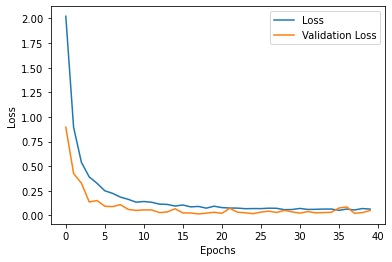

In [130]:
a = optimalModelHist.history['loss']
b = optimalModelHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

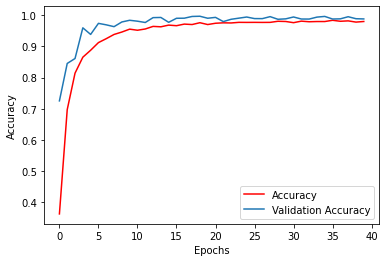

In [131]:
acc_hist = optimalModelHist.history['acc']
val_acc_hist = optimalModelHist.history['val_acc']
plt.plot(range(len(acc_hist)),acc_hist, 'r')
plt.plot(range(len(val_acc_hist)),val_acc_hist)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Validation Accuracy'])

In [132]:
testLoss, testAcc = optimalMod.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 2s 227us/sample - loss: 0.0481 - acc: 0.9886
Test accuracy for this model is 0.9885666370391846


In [133]:
#initialize data for new data frame row
new_row = {'test': ['Final Test: Optimized Model'],
                'training loss': [optimalModelHist.history['loss'][-1]],
              'training acc': [optimalModelHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000356,1.000000,0.641477,0.878834
1,vgg16 reshaped,3.177478,0.045942,3.201718,0.022867
2,1a: 10% DO,0.012577,0.996503,0.657679,0.872560
3,1b: 20% DO,0.019979,0.994075,0.510889,0.901841
4,2a: 10% DO,0.012457,0.996309,0.718474,0.878277
5,2b: 20% DO,0.032945,0.989219,0.384276,0.899610
6,3: 2 DO layers,0.027539,0.991695,0.327521,0.923592
7,4a: remove 120 dense,0.001126,1.000000,0.543059,0.874094
8,4b: remove 84 dense,0.031326,0.990287,0.569954,0.873815
9,"4c: remove 84 dense, add 20% DO",0.034731,0.988733,0.390826,0.902398


In [134]:
# Save the weights (second runthrough)
optimalMod.save_weights('./ASL_CNN_Image_Recognition/optimized_Model_Saved_2')
# no need to save model twice


In [135]:
# Create a new model instance
model = optimizedModel()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy']) 

# Restore the weights
model.load_weights('./ASL_CNN_Image_Recognition/optimized_Model_Saved')

# Evaluate the model
loss, acc = model.evaluate(cnn_x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7172/7172 [==============================] - 2s 283us/sample - loss: 0.0413 - acc: 0.9841
Restored model, accuracy: 98.41%


There are 82/7172 incorrectly labeled signs


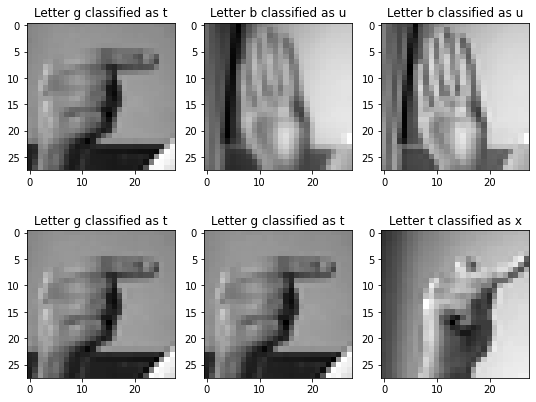

In [136]:
# Shows 6 random incorrect predictions with labels
preds = optimalMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1) # gives the corresponding label
preds_alphabet = numToAlpha(preds)
incorrectPreds = np.argwhere(preds_alphabet != labels_test_alphabet)
print("There are {}/{} incorrectly labeled signs".format(incorrectPreds.shape[0],cnn_x_test.shape[0]))
plt.figure(figsize=(9,7))

for i in range(6):
    plt.subplot(2,3,i+1)
    randIncInd = np.random.choice(incorrectPreds.reshape(-1))
    plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[randIncInd], preds_alphabet[randIncInd]))
    
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

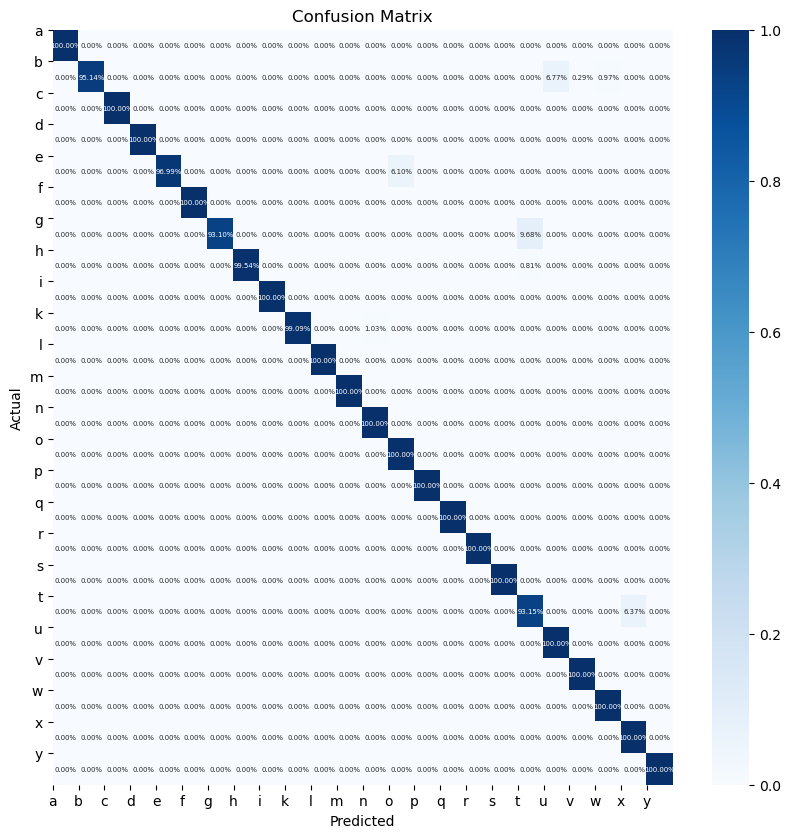

In [137]:
#Plot optimized confusion matrix
alphabet = ['a', 'b',  'c',  'd', 'e', 'f', 
                 'g', 'h', 'i',  'k',  'l', 
                  'm',  'n',  'o',  'p',  'q', 
                  'r', 's',  't',  'u',  'v', 
                  'w','x','y']
conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(range(len(alphabet)), alphabet)
plt.yticks(range(len(alphabet)), alphabet, rotation='horizontal')
plt.xlabel("Predicted")
plt.ylabel("Actual")